C:\Users\linke\AppData\Local\Temp\ipykernel_16024\415043069.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/preprocessed_combined_dataset.csv")  # Replace with your actual file path


Validation of category_encoded column:
        category  category_encoded
0  Men's Fashion                 8
1  Men's Fashion                 8
2  Men's Fashion                 8
3  Men's Fashion                 8
4  Men's Fashion                 8
Feature matrix (X) after dropna:
   age  qty_ordered  discount_amount  price_x  category_encoded
0   43          4.5              0.0     89.9                 8
1   43          4.5              0.0     19.0                 8
2   43          4.5              0.0    149.9                 8
3   43          4.5              0.0     79.9                 8
4   43          2.0              0.0     99.9                 8
Root Mean Squared Error (RMSE): 70.34
Mean Absolute Error (MAE): 31.72
Mean Absolute Percentage Error (MAPE): 57.14%
R² Score: 0.99
Adjusted R²: 0.99


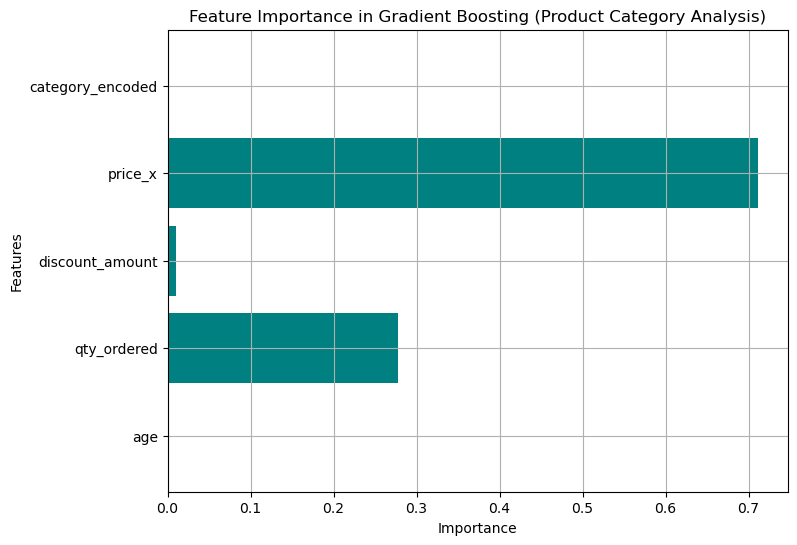

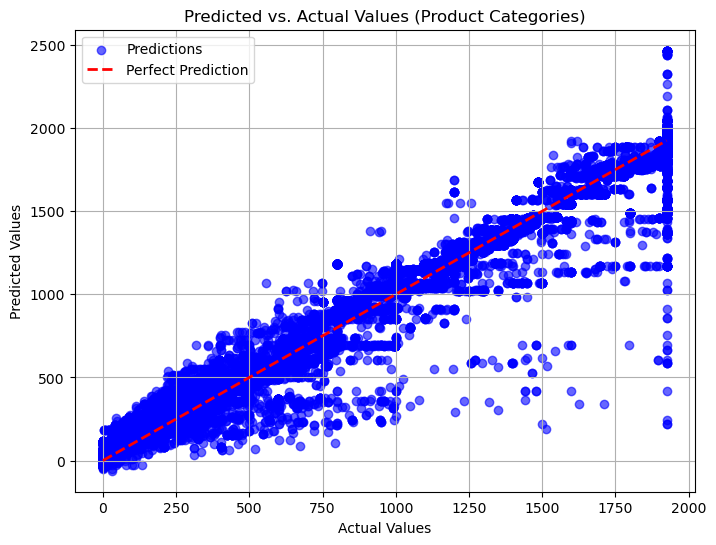

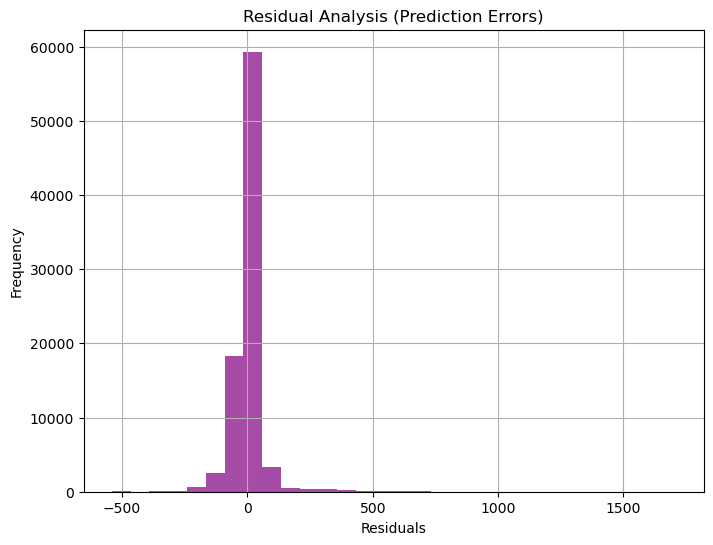

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Load the preprocessed dataset
df = pd.read_csv("data/preprocessed_combined_dataset.csv")  

# Validate the category_encoded column
print("Validation of category_encoded column:")
print(df[['category', 'category_encoded']].head())

# Feature columns including 'category_encoded'
feature_columns = ['age', 'qty_ordered', 'discount_amount', 'price_x', 'category_encoded']

# Drop NaN only in specific columns, preserve category_encoded
X = df[feature_columns].dropna(subset=['age', 'qty_ordered', 'discount_amount', 'price_x'])
y = df['total'].dropna()

# Check X content
print("Feature matrix (X) after dropna:")
print(X.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predictions and evaluation metrics
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Avoid division by zero in MAPE calculation
non_zero_indices = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_indices] - y_pred[non_zero_indices]) / y_test[non_zero_indices])) * 100

r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Display metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R² Score: {r2:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")

# Visualize Feature Importance
feature_importances = gbr.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(feature_columns, feature_importances, color='teal')
plt.title("Feature Importance in Gradient Boosting (Product Category Analysis)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid()
plt.show()

# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')
plt.title("Predicted vs. Actual Values (Product Categories)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Residual Analysis (Error Distribution)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title("Residual Analysis (Prediction Errors)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()
